## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3

EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25
Dropout_EXPS = [0.25,0.3,0.35,0.4,0.45]

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for Dropout_EXP in Dropout_EXPS:
    exp_name_tag = "exp-Dropout_exp-%s" % str(Dropout_EXP)
    print("==",exp_name_tag,"==")
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
___________________________

50000/50000 [==============================] - 8s 152us/step - loss: 1.3217 - acc: 0.5270 - val_loss: 1.3258 - val_acc: 0.5279
Epoch 46/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.3187 - acc: 0.5283 - val_loss: 1.3247 - val_acc: 0.5259
Epoch 47/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3144 - acc: 0.5299 - val_loss: 1.3180 - val_acc: 0.5317
Epoch 48/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3044 - acc: 0.5323 - val_loss: 1.3187 - val_acc: 0.5301
Epoch 49/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3025 - acc: 0.5335 - val_loss: 1.3198 - val_acc: 0.5298
Epoch 50/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.2919 - acc: 0.5395 - val_loss: 1.3091 - val_acc: 0.5335
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)     

Epoch 44/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3848 - acc: 0.5055 - val_loss: 1.3455 - val_acc: 0.5193
Epoch 45/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3792 - acc: 0.5092 - val_loss: 1.3520 - val_acc: 0.5128
Epoch 46/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.3715 - acc: 0.5120 - val_loss: 1.3427 - val_acc: 0.5185
Epoch 47/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3687 - acc: 0.5120 - val_loss: 1.3430 - val_acc: 0.5208
Epoch 48/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.3577 - acc: 0.5137 - val_loss: 1.3326 - val_acc: 0.5233
Epoch 49/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.3536 - acc: 0.5177 - val_loss: 1.3344 - val_acc: 0.5223
Epoch 50/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.3456 - acc: 0.5175 - val_loss: 1.3264 - val_acc: 0.5258
___________________________

50000/50000 [==============================] - 8s 157us/step - loss: 1.4472 - acc: 0.4853 - val_loss: 1.3846 - val_acc: 0.5060
Epoch 43/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.4449 - acc: 0.4828 - val_loss: 1.3801 - val_acc: 0.5054
Epoch 44/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.4366 - acc: 0.4864 - val_loss: 1.3765 - val_acc: 0.5052
Epoch 45/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.4301 - acc: 0.4894 - val_loss: 1.3700 - val_acc: 0.5138
Epoch 46/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.4305 - acc: 0.4894 - val_loss: 1.3676 - val_acc: 0.5150
Epoch 47/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4168 - acc: 0.4988 - val_loss: 1.3670 - val_acc: 0.5100
Epoch 48/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.4180 - acc: 0.4929 - val_loss: 1.3674 - val_acc: 0.5137
Epoch 49/50
50000/50000 [==============

Epoch 41/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5104 - acc: 0.4589 - val_loss: 1.4243 - val_acc: 0.4897
Epoch 42/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5072 - acc: 0.4589 - val_loss: 1.4091 - val_acc: 0.4950
Epoch 43/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4967 - acc: 0.4662 - val_loss: 1.4105 - val_acc: 0.4975
Epoch 44/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.4904 - acc: 0.4646 - val_loss: 1.4101 - val_acc: 0.4950
Epoch 45/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.4884 - acc: 0.4699 - val_loss: 1.4019 - val_acc: 0.4942
Epoch 46/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.4860 - acc: 0.4668 - val_loss: 1.4028 - val_acc: 0.4970
Epoch 47/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.4751 - acc: 0.4703 - val_loss: 1.4002 - val_acc: 0.4917
Epoch 48/50
50000/50000 [==

50000/50000 [==============================] - 8s 151us/step - loss: 1.5840 - acc: 0.4328 - val_loss: 1.4620 - val_acc: 0.4797
Epoch 40/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.5718 - acc: 0.4375 - val_loss: 1.4596 - val_acc: 0.4750
Epoch 41/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5736 - acc: 0.4360 - val_loss: 1.4550 - val_acc: 0.4784
Epoch 42/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5675 - acc: 0.4393 - val_loss: 1.4550 - val_acc: 0.4811
Epoch 43/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5585 - acc: 0.4431 - val_loss: 1.4454 - val_acc: 0.4828
Epoch 44/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5524 - acc: 0.4470 - val_loss: 1.4434 - val_acc: 0.4854
Epoch 45/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5498 - acc: 0.4472 - val_loss: 1.4498 - val_acc: 0.4793
Epoch 46/50
50000/50000 [==============

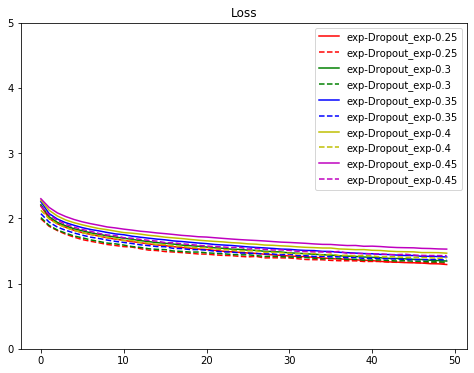

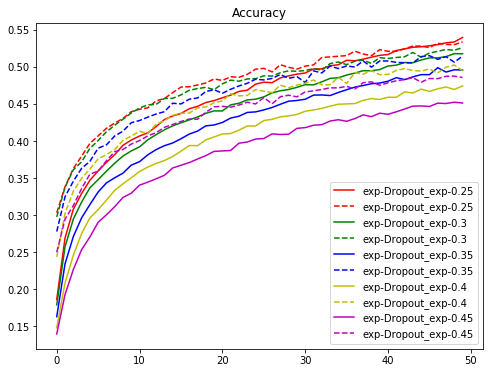

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [18]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3

EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25
Dropout_EXPS = [0.15,0.2,0.25,0.3]

In [21]:
results_adam = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
print("optimizer=Adam")
for Dropout_EXP in Dropout_EXPS:
    exp_name_tag = "exp-Dropout_exp-%s" % str(Dropout_EXP)
    print("==",exp_name_tag,"==")
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    
    results_adam[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

optimizer=Adam
== exp-Dropout_exp-0.15 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_24 (Dropout)         (None

Epoch 49/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.2820 - acc: 0.5381 - val_loss: 1.3480 - val_acc: 0.5195
Epoch 50/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.2833 - acc: 0.5386 - val_loss: 1.3601 - val_acc: 0.5189
== exp-Dropout_exp-0.2 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_26 (Dropout)         (None

50000/50000 [==============================] - 9s 189us/step - loss: 1.4148 - acc: 0.4912 - val_loss: 1.4400 - val_acc: 0.4881
Epoch 48/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.4015 - acc: 0.4969 - val_loss: 1.3779 - val_acc: 0.5050
Epoch 49/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.3858 - acc: 0.5013 - val_loss: 1.3959 - val_acc: 0.5005
Epoch 50/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.3993 - acc: 0.4945 - val_loss: 1.3754 - val_acc: 0.5086
== exp-Dropout_exp-0.25 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_28 (Dropout)         (N

50000/50000 [==============================] - 10s 194us/step - loss: 1.5045 - acc: 0.4596 - val_loss: 1.4746 - val_acc: 0.4777
Epoch 46/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.4938 - acc: 0.4625 - val_loss: 1.4732 - val_acc: 0.4757
Epoch 47/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.5053 - acc: 0.4594 - val_loss: 1.4944 - val_acc: 0.4735
Epoch 48/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.4886 - acc: 0.4639 - val_loss: 1.4484 - val_acc: 0.4815
Epoch 49/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.5008 - acc: 0.4604 - val_loss: 1.4413 - val_acc: 0.4850
Epoch 50/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.4869 - acc: 0.4637 - val_loss: 1.4552 - val_acc: 0.4840
== exp-Dropout_exp-0.3 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (Inpu

50000/50000 [==============================] - 10s 190us/step - loss: 1.5483 - acc: 0.4423 - val_loss: 1.4845 - val_acc: 0.4786
Epoch 44/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5552 - acc: 0.4392 - val_loss: 1.5217 - val_acc: 0.4649
Epoch 45/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.5522 - acc: 0.4384 - val_loss: 1.5038 - val_acc: 0.4744
Epoch 46/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.5413 - acc: 0.4451 - val_loss: 1.5430 - val_acc: 0.4639 1.5412 - 
Epoch 47/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.5468 - acc: 0.4404 - val_loss: 1.5320 - val_acc: 0.4584
Epoch 48/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.5347 - acc: 0.4481 - val_loss: 1.4717 - val_acc: 0.4836
Epoch 49/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.5416 - acc: 0.4448 - val_loss: 1.4956 - val_acc: 0.4739
Epoch 50/50
50000/50000

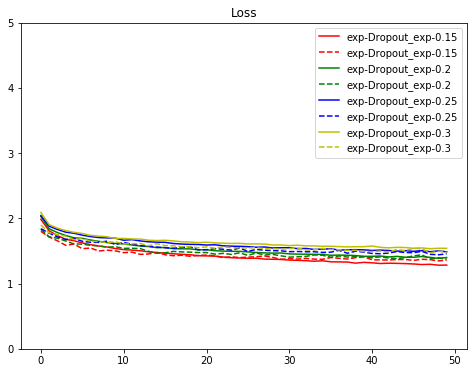

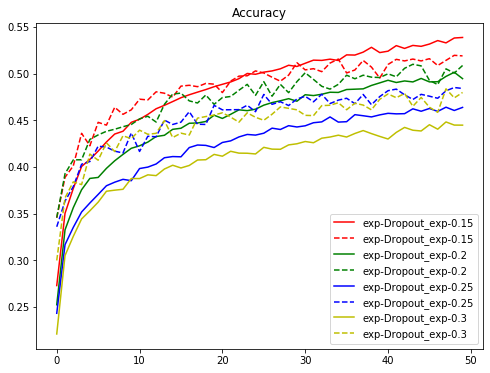

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_adam.keys()):
    plt.plot(range(len(results_adam[cond]['train-loss'])),results_adam[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_adam[cond]['valid-loss'])),results_adam[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_adam.keys()):
    plt.plot(range(len(results_adam[cond]['train-acc'])),results_adam[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_adam[cond]['valid-acc'])),results_adam[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()